# PHAS0031:Computational Physics: Week 2: Assessment
## Joshua Giblin-Burnham(SN.:19052055)

### Introduction:
This notebook provides an exploration of root finding, using interval bisection, and optimisation of multi-dimensional non-linear functions as they pertain to the physical example of a Quantum Harmonic Oscilators(QHO). In this case we seek to minimise the energy of a QHO, this is achieved by finding the root of the gradient of the energy function.

In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#### Interval Bisection Function:

In [2]:
def bisec(f,a,b,tol):
    '''Implements the bisection method, refining interval of root to given tolerence.
    Input:
    f     Function to evaluate
    a,b   Brackets, initial interval in which root lies
    tol   Tolerance to which interval is refined
    
    Returns number of iteration and the value of root found
    '''
    n=0
    # Initialises count
    
    while abs(a-b)>tol:
    # Loops untill the width of brakets is within the tolerence 
        n+=1
        c=(a+b)/2
        # Finds midpoint between a and b
        
        if f(c)/f(a)>0:
        # If f(a) and f(c) have same sign, a isreplaced with c
            a=c
        else:
        # If f(a) and f(c) have oppisite sign, b is replaced with c
            b=c

    return n, c

### Section 1: 1D QHO
For the one-dimensional quantum harmonic oscillator, in atomic units such that $\hbar=m_e=1$, we can write the Hamiltonian as, $H=-\frac{1}{2}\frac{d^2}{dx^2}+\frac{1}{2}\omega^2x^2$, and setting $\omega=1$(in appropriate units) we then get a solution for the ground state given as the following Gaussian, $\psi(x)=(2\alpha/\pi)^{1/4}e^{-\alpha x^2}$ . For this wavefunction we then get the energy given as:

$$ {E}_{GS}=\frac{\alpha}{2}+\frac{1}{8\alpha}$$ 
With a gradient given as:
$$ \nabla{E}_{GS}=\frac{1}{2}-\frac{1}{8\alpha^2}$$

We will define these as functions and run the gradient through out interval bisection function to find its root and minimum energy.

In [3]:
def QHO_E(a):
    '''1D QHO Function'''
    
    a=np.ma.masked_equal(a,0)
    # Masks elements of array equal to zero
    # Maintains array shape but excludes zeros from calculations(as they introduce inf )
    
    return a/2+1/(8*a)

In [4]:
def QHO_gradE(a):
    '''Differential of 1D QHO Function'''
    
    a=np.ma.masked_equal(a,0)
    # Masks elements of array equal to zero
    # Maintains array shape but excludes zeros from calculations(as they introduce inf )
    
    return 1/2-1/(8*a**2)

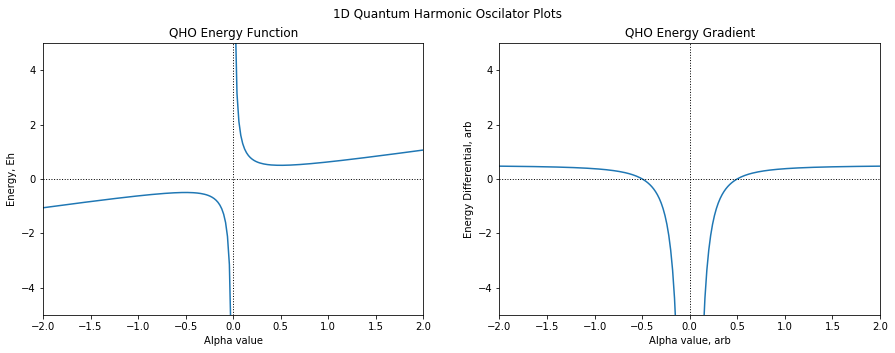

In [199]:
# Generate array of alpha values
a= np.linspace(-2,2,201)

# Creating subplot to plot Energy and Gradient Functions
plot1, (E, GradE)= plt.subplots(1, 2, figsize=(15,5))
plot1.suptitle('1D Quantum Harmonic Oscilator Plots')

# Energy subplot- inc labelling, x/y limits and dotted x/y axis
E.plot(a,QHO_E(a))
E.axhline(color='k',ls=':', lw='1')
E.axvline(color='k',ls=':', lw='1')
E.set_title('QHO Energy Function')
E.set_xlim(-2, 2)
E.set_ylim(-5, 5)
E.set(xlabel='Alpha value, arb',ylabel='Energy, Eh')

# Energy Gradient subplot- inc labelling, x/y limits and dotted x/y axis
GradE.plot(a,QHO_gradE(a))
GradE.axhline(color='k',ls=':', lw='1')
GradE.axvline(color='k',ls=':', lw='1')
GradE.set_title('QHO Energy Gradient')
GradE.set_xlim(-2, 2)
GradE.set_ylim(-5, 5)
GradE.set(xlabel='Alpha value, arb',ylabel='Energy Differential, arb')

plt.show()

In [184]:
# Define brackets and tolerance
neg_brac=[-0.6,-0.1] # Min
pos_brac=[0.6,0.1] # Max
tol= 10**-8

# Calls bisection function on gradient function 
root1=bisec(QHO_gradE, neg_brac[0], neg_brac[1], tol)
root2=bisec(QHO_gradE, pos_brac[0], pos_brac[1], tol)

# Calculates the value of gradient for the roots
gradval1= QHO_gradE(root1[1])
gradval2= QHO_gradE(root2[1])

# Printing results
print('For the interval {0} the root is calculated to be {3} for {2} iterations and tolerance of {1}.    '
      'This root given to 8.s.f is {3:.8f} and corresponding value of the gradient at this point is {4}.\n'
      .format( neg_brac, tol, root1[0], root1[1], gradval1))

print('For the interval {0} the root is calculated to be {3} for {2} iterations and tolerance of {1}.      '
      'The root given to 8.s.f this is {3:.8f} and corresponding value of the gradient at this point is {4}.'
      .format( pos_brac, tol, root2[0], root2[1], gradval2))

For the interval [-0.6, -0.1] the root is calculated to be -0.49999999850988386 for 26 iterations and tolerance of 1e-08.    This root given to 8.s.f is -0.50000000 and corresponding value of the gradient at this point is -2.9802322831784522e-09.

For the interval [0.6, 0.1] the root is calculated to be 0.49999999850988386 for 26 iterations and tolerance of 1e-08.      The root given to 8.s.f this is 0.50000000 and corresponding value of the gradient at this point is -2.9802322831784522e-09.


#### Comment:
We can see from the graph that the QHO energy gradient has two roots symmetric around the y-axis, these can be calculated by hand to be $\pm0.5$. These can both be found using our bisection function; as we are looking at the differential it does not distinguish between maxima and minima but from our plots we can see $\alpha= 0.5$ is the minima and $\alpha= -0.5$ is the maxima. Evaluating our `bisec` function we can see it is accurate up to 8 significant figures, furthermore, the gradient evaluated at the root found gives $\approx -2.98x10^{-9}$. This can be made more precise by increasing the tolerance, however, it will never pass a absolute value and the ultimate precision it can reach is only that of the system as it'll will refine the interval untill the bracket width is lower than the systems zero value. For our purposes this pecision given is adequet, however, for this number of iteration this is a fairly inefficient method.

### Section 2: 2D QHO
Next we will look at the two-dimensional quantum harmonic oscillator, again finding the exponents for the lowest energy. For a wavefunction $\psi(x,y)=(2\alpha/\pi)^{1/4}e^{-\alpha x^2}(2\beta/\pi)^{1/4}e^{-\beta y^2}$ the energy can be written:

$$E_{GS}=\frac{\alpha}{2}+\frac{1}{8\alpha}+\frac{\beta}{2}+\frac{1}{8\beta} Eq. 2 $$
With a gradient given as:
$$ \nabla{E}_{GS}=(\frac{1}{2}-\frac{1}{8\alpha^2},\frac{1}{2}-\frac{1}{8\beta^2})$$

Again we will define these as functions and run the gradient through the spipy `optimize.minimize` function to find its root and minimum energy.

In [7]:
def QHO_2D_E(ab):
    '''QHO 2D Function'''
    ab=np.ma.masked_equal(ab,0)
    # Masks elements of array equal to zero
    # Maintains array shape but excludes zeros from calculations(as they introduce inf )
    
    return ab[0]/2 + 1/(8*ab[0]) + ab[1]/2 + 1/(8*ab[1])

In [8]:
def QHO_2D_gradE(ab):
    '''Vector differential of QHO 2D function'''
    ab=np.ma.masked_equal(ab,0)
    # Masks elements of array equal to zero
    # Maintains array shape but excludes zeros from calculations(as they introduce inf )
    
    dE_da= 1/2 - 1/(8*ab[0]**2)
    dE_db= 1/2 - 1/(8*ab[1]**2) 
    # Calculates alpha and beta components
    
    return np.array([dE_da,dE_db])

In [214]:
# Generate array of alpha/ beta values and creates meshgrid for each point
a0= b0= np.linspace(-2,2,51)
#recommended to plot [0.1,1] but used [-2,2] for fuller view
a2D, b2D = np.meshgrid(a0,b0)
ab= np.array([a2D,b2D])

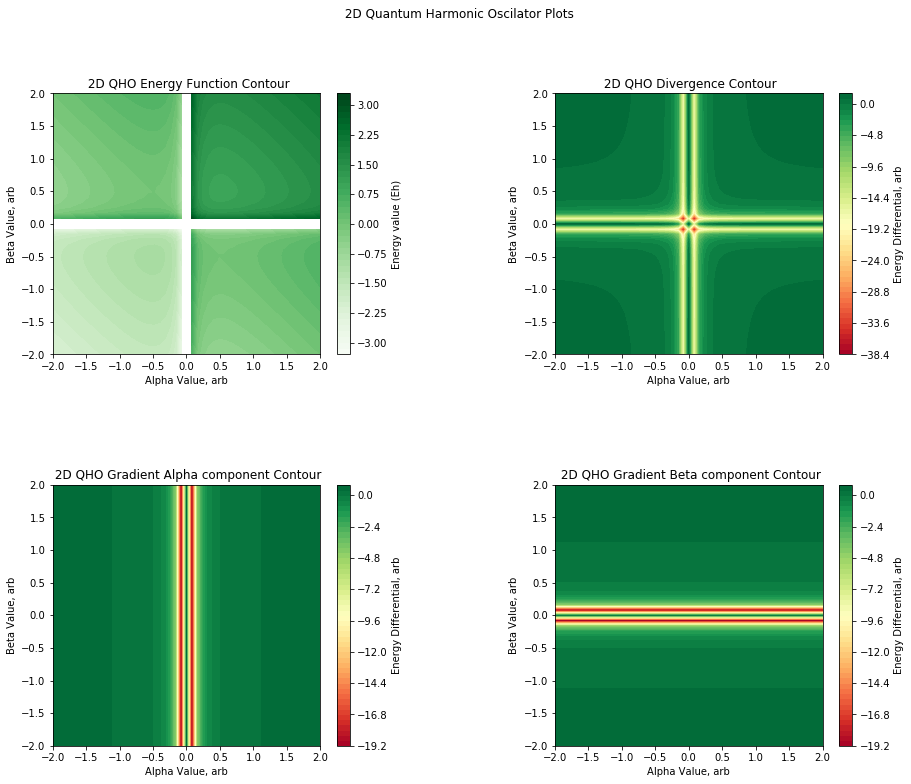

In [217]:
# Creating subplot to plot Energy and Gradient Functions
plot2, ax = plt.subplots(2, 2, figsize=(15,12))
plot2.suptitle(' 2D Quantum Harmonic Oscilator Plots')

# Energy subplot- inc labelling and color bar
im1= ax[0,0].contourf(a2D, b2D, QHO_2D_E(ab), 50, cmap='Greens')
ax[0,0].set(xlabel= 'Alpha Value, arb', ylabel= 'Beta Value, arb')
ax[0,0].set_title(' 2D QHO Energy Function Contour')
cbar1= plot2.colorbar(im1,ax=ax[0,0])
cbar1.set_label('Energy value (Eh)')

# Divergence contor plot-inc labelling and color bar (not required but intresting)
im2= ax[0,1].contourf(a2D, b2D, QHO_2D_gradE(ab)[0]+QHO_2D_gradE(ab)[1], 50, cmap='RdYlGn')
ax[0,1].set(xlabel= 'Alpha Value, arb', ylabel= 'Beta Value, arb')
ax[0,1].set_title(' 2D QHO Divergence Contour')
cbar2= plot2.colorbar(im2,ax=ax[0,1])
cbar2.set_label('Energy Differential, arb')

# Energy Gradient subplot for alpha comp- inc labelling and color bar
im3= ax[1,0].contourf(a2D, b2D, QHO_2D_gradE(ab)[0], 50, cmap='RdYlGn')
ax[1,0].set(xlabel= 'Alpha Value, arb', ylabel= 'Beta Value, arb')
ax[1,0].set_title(' 2D QHO Gradient Alpha component Contour')
cbar3= plot2.colorbar(im3,ax=ax[1,0])
cbar3.set_label('Energy Differential, arb')

# Energy Gradient subplot for beta comp- inc labelling and color bar
im4= ax[1,1].contourf(a2D, b2D, QHO_2D_gradE(ab)[1], 50, cmap='RdYlGn')
ax[1,1].set(xlabel= 'Alpha Value, arb', ylabel= 'Beta Value, arb')
ax[1,1].set_title(' 2D QHO Gradient Beta component Contour')
cbar4= plot2.colorbar(im4,ax=ax[1,1])
cbar4.set_label('Energy Differential, arb')

plt.subplots_adjust(wspace=0.5, hspace=0.5) 
# edit spacing

In [216]:
# Define start point
x0 = np.array([ 2, 1]) 

# Calling optimize functiion
opt_result = optimize.minimize(QHO_2D_E, x0, method='CG', jac=QHO_2D_gradE)

# Print resulting minimum, number of iterations and confirm whether successfu
print('Minimum found to be at {0}, this result is a {1} result and found in {2} iterations'
      .format(opt_result.x,opt_result.success,opt_result.nit))

Minimum found to be at [0.5 0.5], this result is a True result and found in 6 iterations


#### Comment:
Calculating the roots of the derivatives by hand we expect to have 4 pairs of minima, being variations of [$\pm0.5,\pm0.5$]. However, the symmetry of the function means 2 of these results are saddle points,[$\pm0.5,\mp0.5$], and the root at [$-0.5,-0.5$] is a maxima, therefore, the only minimum is at [$0.5,0.5$] (looking on the contour for the energy this can be seen looking at the colour map ). Passing the `optimize.minimize`function for our energy function and gradient we sucessfuly return this exact result. We see this built-in function is much more efficient compared with our interval bisection function requiring 1/4 the number of iteratons.

### Conclusions
In conclusion, we have effectively explored root finding, implimenting interval bisection and evaluating its precision. We've seen it simplicity yet the llimitations in its efficiency and large number of iterations it requires. For 2D equations we have examined spipy's `optimize.minimize` function, which is much more efficient and the ability to check sucessfulness of finding the root makes it very useful in the case of false minima.